In [800]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt


In [802]:
# import the dataset to Jupyter

In [804]:
Nmovies = pd.read_csv('C:\\Users\\test\\Downloads\\top10K-TMDB-movies.csv\\top10K-TMDB-movies.csv')

In [806]:
# display the first 5 rows of the dataset

In [808]:
Nmovies.head(5)

,id,title,genre,original_language,overview,popularity,release_date,vote_average,vote_count
0,278,The Shawshank Redemption,"Drama,Crime",en,Framed in the 1940s for the double murder of h...,94.075,1994-09-23,8.7,21862
1,19404,Dilwale Dulhania Le Jayenge,"Comedy,Drama,Romance",hi,"Raj is a rich, carefree, happy-go-lucky second...",25.408,1995-10-19,8.7,3731
2,238,The Godfather,"Drama,Crime",en,"Spanning the years 1945 to 1955, a chronicle o...",90.585,1972-03-14,8.7,16280
3,424,Schindler's List,"Drama,History,War",en,The true story of how businessman Oskar Schind...,44.761,1993-12-15,8.6,12959
4,240,The Godfather: Part II,"Drama,Crime",en,In the continuing saga of the Corleone crime f...,57.749,1974-12-20,8.6,9811


In [810]:
# display the last 5 rows of the dataset

In [812]:
Nmovies.tail(5)

,id,title,genre,original_language,overview,popularity,release_date,vote_average,vote_count
9995,10196,The Last Airbender,"Action,Adventure,Fantasy",en,"The story follows the adventures of Aang, a yo...",98.322,2010-06-30,4.7,3347
9996,331446,Sharknado 3: Oh Hell No!,"Action,TV Movie,Science Fiction,Comedy,Adventure",en,The sharks take bite out of the East Coast whe...,12.490,2015-07-22,4.7,417
9997,13995,Captain America,"Action,Science Fiction,War",en,"During World War II, a brave, patriotic Americ...",18.333,1990-12-14,4.6,332
9998,2312,In the Name of the King: A Dungeon Siege Tale,"Adventure,Fantasy,Action,Drama",en,A man named Farmer sets out to rescue his kidn...,15.159,2007-11-29,4.7,668
9999,455957,Domino,"Thriller,Action,Crime",en,Seeking justice for his partner’s murder by an...,16.482,2019-05-31,4.6,221


In [814]:
# The dataset has 10000 rows and 9 columns 

Nmovies.shape

(10000, 9)

In [816]:
Nmovies.describe()

,id,popularity,vote_average,vote_count
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,161243.505000,34.697267,6.621150,1547.309400
std,211422.046043,211.684175,0.766231,2648.295789
min,5.000000,0.600000,4.600000,200.000000
25%,10127.750000,9.154750,6.100000,315.000000
50%,30002.500000,13.637500,6.600000,583.500000
75%,310133.500000,25.651250,7.200000,1460.000000
max,934761.000000,10436.917000,8.700000,31917.000000


In [818]:
Nmovies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 10000 non-null  int64  
 1   title              10000 non-null  object 
 2   genre              9997 non-null   object 
 3   original_language  10000 non-null  object 
 4   overview           9987 non-null   object 
 5   popularity         10000 non-null  float64
 6   release_date       10000 non-null  object 
 7   vote_average       10000 non-null  float64
 8   vote_count         10000 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 703.3+ KB


In [820]:
# visualise the missing value; from the graph, we can understand that the overview has high missing values.
Nmovies.isnull().sum()

id                    0
title                 0
genre                 3
original_language     0
overview             13
popularity            0
release_date          0
vote_average          0
vote_count            0
dtype: int64

<Axes: >

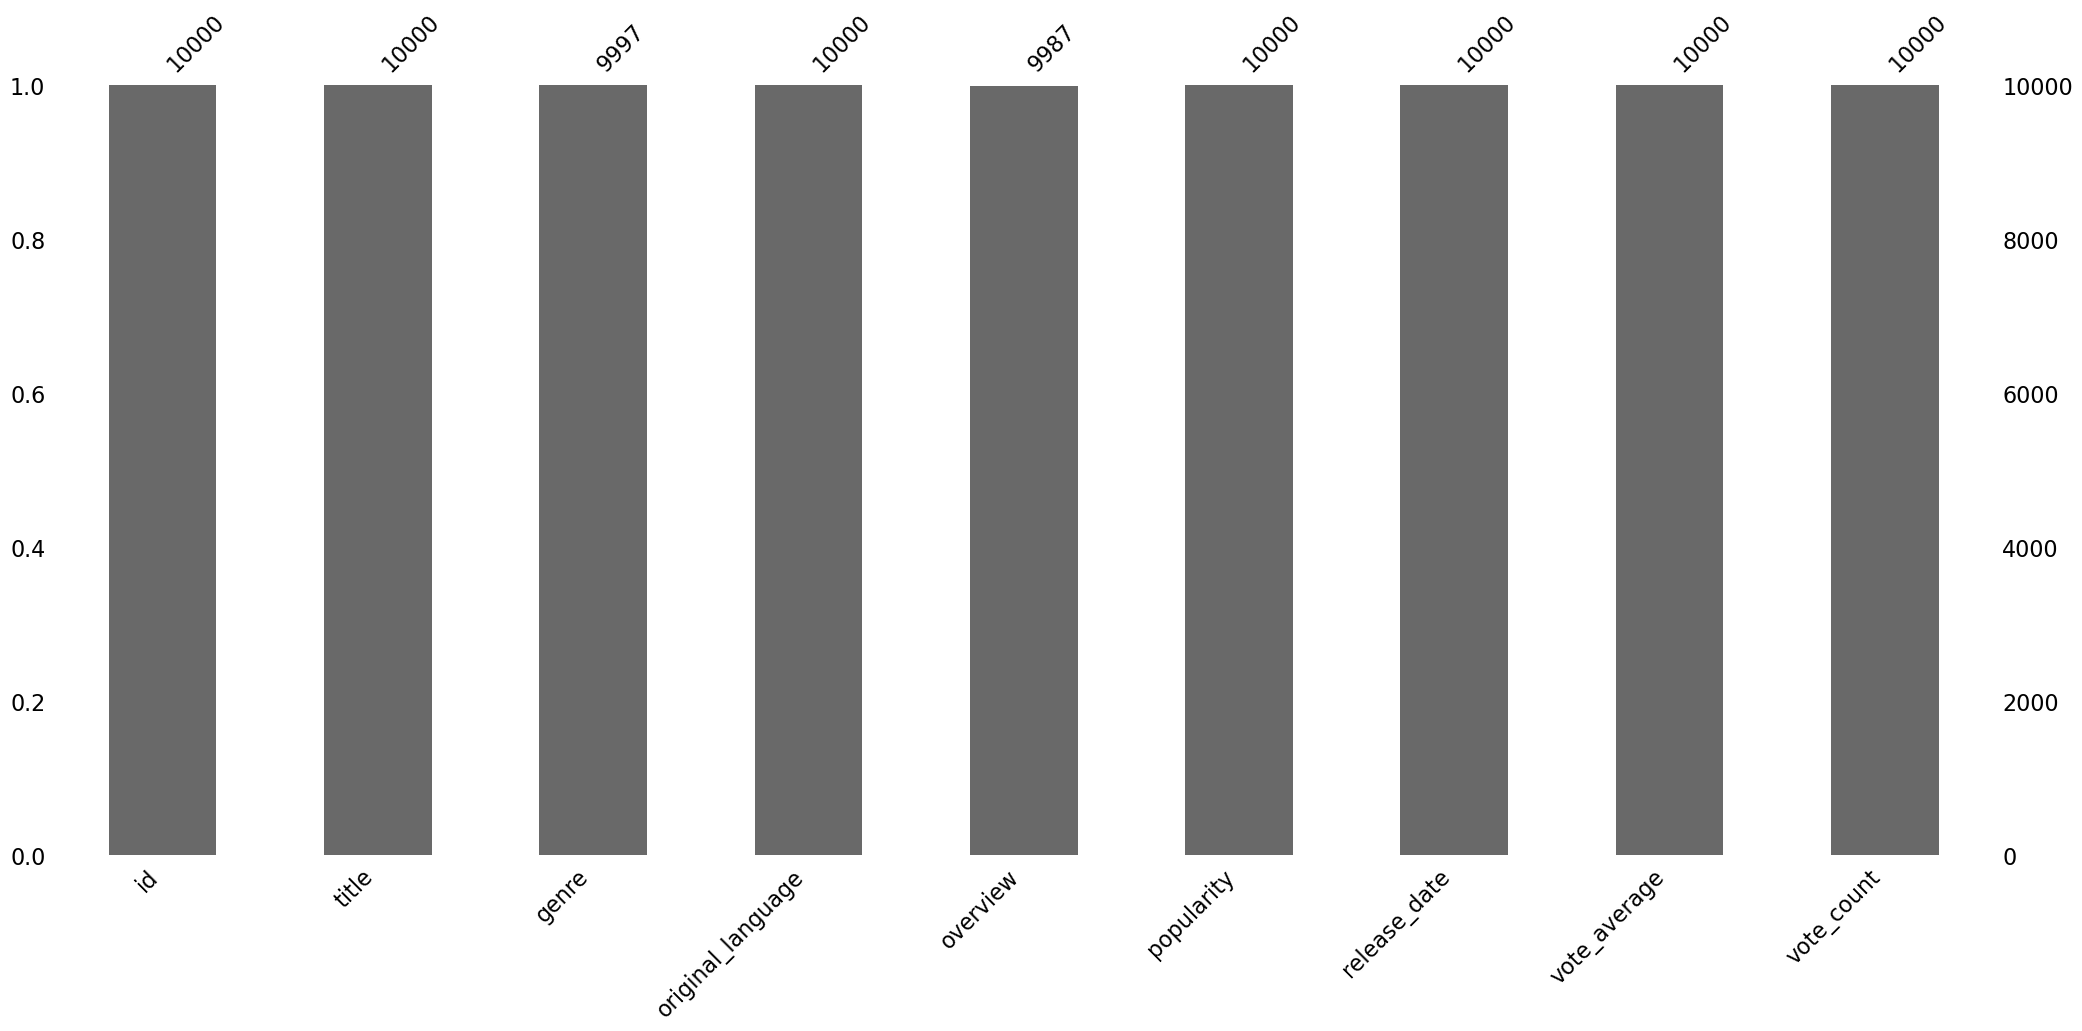

In [822]:
msno.bar(Nmovies)

In [824]:
# Specifying the null values of genre and overview to fill the missing value
Null_overview=Nmovies[Nmovies['overview'].isnull()]
print(Null_overview.isnull())
Null_genre=Nmovies[Nmovies['genre'].isnull()]
print(Null_genre.isnull())
    

         id  title  genre  original_language  overview  popularity  \
4150  False  False  False              False      True       False   
6973  False  False  False              False      True       False   
7941  False  False  False              False      True       False   
8518  False  False   True              False      True       False   
9293  False  False  False              False      True       False   
9440  False  False  False              False      True       False   
9620  False  False  False              False      True       False   
9792  False  False  False              False      True       False   
9825  False  False  False              False      True       False   
9889  False  False  False              False      True       False   
9915  False  False  False              False      True       False   
9922  False  False  False              False      True       False   
9989  False  False  False              False      True       False   

      release_date 

In [826]:
# Removing the missing values in an overview
Nmovies=Nmovies[Nmovies['overview'].notna()]

In [828]:
Nmovies.isnull().sum()

id                   0
title                0
genre                2
original_language    0
overview             0
popularity           0
release_date         0
vote_average         0
vote_count           0
dtype: int64

In [830]:
# We can replace the missing values in genre using MODE(Which replaces the missing value with the movie which has high frequency)
Nmovies['genre']=Nmovies['genre'].fillna(Nmovies['genre'].mode()[0])
Nmovies['genre'].isnull().sum()

0

In [832]:
# All the missing values are fixed.
Nmovies.isna().sum()

id                   0
title                0
genre                0
original_language    0
overview             0
popularity           0
release_date         0
vote_average         0
vote_count           0
dtype: int64

In [834]:
Nmovies.shape

(9987, 9)

In [836]:
# Check for duplicate values in the dataset

In [838]:
Nmovies.duplicated().any()

False

In [840]:
Nmovies.columns

Index(['id', 'title', 'genre', 'original_language', 'overview', 'popularity',
       'release_date', 'vote_average', 'vote_count'],
      dtype='object')

In [842]:
# fillter out columns that are important for the feature analysis such as id, title, overview and genre
Nmovies=Nmovies[['id' , 'title' , 'overview' , 'genre']]

In [844]:
# After the removal of unnessery columns we get 4 features.
Nmovies

,id,title,overview,genre
0,278,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,"Drama,Crime"
1,19404,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second...","Comedy,Drama,Romance"
2,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...","Drama,Crime"
3,424,Schindler's List,The true story of how businessman Oskar Schind...,"Drama,History,War"
4,240,The Godfather: Part II,In the continuing saga of the Corleone crime f...,"Drama,Crime"
...,...,...,...,...
9995,10196,The Last Airbender,"The story follows the adventures of Aang, a yo...","Action,Adventure,Fantasy"
9996,331446,Sharknado 3: Oh Hell No!,The sharks take bite out of the East Coast whe...,"Action,TV Movie,Science Fiction,Comedy,Adventure"
9997,13995,Captain America,"During World War II, a brave, patriotic Americ...","Action,Science Fiction,War"
9998,2312,In the Name of the King: A Dungeon Siege Tale,A man named Farmer sets out to rescue his kidn...,"Adventure,Fantasy,Action,Drama"


In [846]:
# For a content-based recommendation system we have to merge the overview and genre
Nmovies['tags'] = Nmovies['overview']+Nmovies['genre']

In [848]:
Nmovies

,id,title,overview,genre,tags
0,278,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,"Drama,Crime",Framed in the 1940s for the double murder of h...
1,19404,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second...","Comedy,Drama,Romance","Raj is a rich, carefree, happy-go-lucky second..."
2,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...","Drama,Crime","Spanning the years 1945 to 1955, a chronicle o..."
3,424,Schindler's List,The true story of how businessman Oskar Schind...,"Drama,History,War",The true story of how businessman Oskar Schind...
4,240,The Godfather: Part II,In the continuing saga of the Corleone crime f...,"Drama,Crime",In the continuing saga of the Corleone crime f...
...,...,...,...,...,...
9995,10196,The Last Airbender,"The story follows the adventures of Aang, a yo...","Action,Adventure,Fantasy","The story follows the adventures of Aang, a yo..."
9996,331446,Sharknado 3: Oh Hell No!,The sharks take bite out of the East Coast whe...,"Action,TV Movie,Science Fiction,Comedy,Adventure",The sharks take bite out of the East Coast whe...
9997,13995,Captain America,"During World War II, a brave, patriotic Americ...","Action,Science Fiction,War","During World War II, a brave, patriotic Americ..."
9998,2312,In the Name of the King: A Dungeon Siege Tale,A man named Farmer sets out to rescue his kidn...,"Adventure,Fantasy,Action,Drama",A man named Farmer sets out to rescue his kidn...


In [850]:
# Let's drop the overview and genre as they already merged in tags
New_data = Nmovies.drop(columns=['overview', 'genre'])

In [852]:
New_data

,id,title,tags
0,278,The Shawshank Redemption,Framed in the 1940s for the double murder of h...
1,19404,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second..."
2,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o..."
3,424,Schindler's List,The true story of how businessman Oskar Schind...
4,240,The Godfather: Part II,In the continuing saga of the Corleone crime f...
...,...,...,...
9995,10196,The Last Airbender,"The story follows the adventures of Aang, a yo..."
9996,331446,Sharknado 3: Oh Hell No!,The sharks take bite out of the East Coast whe...
9997,13995,Captain America,"During World War II, a brave, patriotic Americ..."
9998,2312,In the Name of the King: A Dungeon Siege Tale,A man named Farmer sets out to rescue his kidn...


In [854]:
# Apply algorithms to convert textual data in to vector using Bag of word and TFIDF

In [856]:
from sklearn.feature_extraction.text import CountVectorizer

In [858]:
CV=CountVectorizer(max_features=9987, stop_words='english')

In [860]:
CV

CountVectorizer(max_features=9987, stop_words='english')

In [862]:
Vector = CV.fit_transform(New_data['tags'].values.astype('U')).toarray()

In [864]:
Vector.shape

(9987, 9987)

In [866]:
# Use a cosine similarity technique to recommend a movie similar to another. For instance, if a user watches an action movie, using cosine similarity, we calculate the closest distance between them and recommend the user another action movie.

In [868]:
# import cosine similarity 
from sklearn.metrics.pairwise import cosine_similarity

In [870]:
similarity=cosine_similarity(Vector)

In [872]:
similarity

array([[1.        , 0.05634362, 0.13041013, ..., 0.07559289, 0.11065667,
        0.06900656],
       [0.05634362, 1.        , 0.07715167, ..., 0.        , 0.03636965,
        0.        ],
       [0.13041013, 0.07715167, 1.        , ..., 0.02300219, 0.0673435 ,
        0.09449112],
       ...,
       [0.07559289, 0.        , 0.02300219, ..., 1.        , 0.03253   ,
        0.03042903],
       [0.11065667, 0.03636965, 0.0673435 , ..., 0.03253   , 1.        ,
        0.04454354],
       [0.06900656, 0.        , 0.09449112, ..., 0.03042903, 0.04454354,
        1.        ]])

In [874]:
# use the index number to recommend a movie

In [876]:
New_data[New_data['title']=='The Godfather'].index[0]

2

In [878]:
distance = sorted(list(enumerate(similarity[2])), reverse=True, key=lambda vector:vector[1])
for i in distance[0:5]:
    print(New_data.iloc[i[0]].title)

The Godfather
The Godfather: Part II
Blood Ties
Joker
Bomb City


In [880]:
def Netflix_Recommand(movies):
    index=New_data[New_data['title']==movies].index[0]
    distance = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda vector:vector[1])
    for i in distance[0:5]: # recommedning the top 5 movies
        print(New_data.iloc[i[0]].title)

In [882]:
# Test recommendation system

Netflix_Recommand('Joker')

Joker
Blood Ties
The Big Heat
Dead Man Down
Chopper


In [884]:
# save the file into  pilkle to use it later.

In [886]:
import pickle

In [888]:
pickle.dump(New_data, open('movies_list.pkl', 'wb'))

In [890]:
pickle.dump(similarity, open('similarity.pkl' , 'wb'))

In [891]:
pickle.load(open('movies_list.pkl' , 'rb'))

,id,title,tags
0,278,The Shawshank Redemption,Framed in the 1940s for the double murder of h...
1,19404,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second..."
2,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o..."
3,424,Schindler's List,The true story of how businessman Oskar Schind...
4,240,The Godfather: Part II,In the continuing saga of the Corleone crime f...
...,...,...,...
9995,10196,The Last Airbender,"The story follows the adventures of Aang, a yo..."
9996,331446,Sharknado 3: Oh Hell No!,The sharks take bite out of the East Coast whe...
9997,13995,Captain America,"During World War II, a brave, patriotic Americ..."
9998,2312,In the Name of the King: A Dungeon Siege Tale,A man named Farmer sets out to rescue his kidn...
